In [360]:
# IMPORTING LIBRARIES

In [361]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
from sklearn.ensemble import AdaBoostClassifier

In [362]:
# dataset from kaggle about diabetes
df = pd.read_csv('athlete_drug_use_dataset.csv')
df

,Athlete_ID,Age,Gender,Sport_Type,Hematocrit (%),Hemoglobin (g/dL),EPO_Level (mIU/mL),T/E_Ratio,hGH (ng/mL),Steroid_Metabolites,Beta_2_Agonist (ng/mL),Stimulant_Detection,Diuretics_Masking_Agents,Creatine_Kinase (U/L),Lactate_Threshold (mmol/L),Blood_pH,Drug_Use
0,6900,39,Female,Running,40.78,17.16,6.81,6.28,1.26,No,No,No,No,150,4.49,7.38,No
1,2018,36,Female,Soccer,40.29,13.41,56.05,2.96,11.91,Yes,Yes,No,Yes,496,8.86,7.32,Yes
2,4534,35,Female,Swimming,49.53,13.55,16.12,12.15,2.07,Yes,No,No,No,258,2.98,7.36,Yes
3,6487,22,Female,Running,54.97,17.91,44.72,4.03,6.29,Yes,No,Yes,No,480,11.33,7.33,Yes
4,7953,25,Female,Running,40.56,17.79,22.57,7.68,19.32,No,Yes,No,Yes,111,3.57,7.43,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1896,18,Female,Basketball,54.66,14.76,29.39,2.38,2.49,No,No,No,No,276,2.60,7.22,No
496,6820,34,Female,Swimming,45.37,14.73,11.69,14.91,3.66,Yes,No,No,Yes,257,2.74,7.44,Yes
497,6923,25,Male,Basketball,43.73,16.46,59.42,2.15,1.69,Yes,No,No,Yes,485,10.71,7.20,Yes
498,5457,39,Female,Soccer,48.54,14.00,47.62,3.44,7.25,Yes,No,No,Yes,435,8.65,7.28,Yes


In [363]:
# Data Summary

In [364]:
# to print column names of our dataframe use .columns attribute
df.columns

Index(['Athlete_ID', 'Age', 'Gender', 'Sport_Type', 'Hematocrit (%)',
       'Hemoglobin (g/dL)', 'EPO_Level (mIU/mL)', 'T/E_Ratio', 'hGH (ng/mL)',
       'Steroid_Metabolites', 'Beta_2_Agonist (ng/mL)', 'Stimulant_Detection',
       'Diuretics_Masking_Agents', 'Creatine_Kinase (U/L)',
       'Lactate_Threshold (mmol/L)', 'Blood_pH', 'Drug_Use'],
      dtype='object')

In [365]:
list1 = df.columns[:-1] # not considering outcome column 
list1

Index(['Athlete_ID', 'Age', 'Gender', 'Sport_Type', 'Hematocrit (%)',
       'Hemoglobin (g/dL)', 'EPO_Level (mIU/mL)', 'T/E_Ratio', 'hGH (ng/mL)',
       'Steroid_Metabolites', 'Beta_2_Agonist (ng/mL)', 'Stimulant_Detection',
       'Diuretics_Masking_Agents', 'Creatine_Kinase (U/L)',
       'Lactate_Threshold (mmol/L)', 'Blood_pH'],
      dtype='object')

In [366]:
df.info() # information about dataset 
print(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Athlete_ID                  500 non-null    int64  
 1   Age                         500 non-null    int64  
 2   Gender                      500 non-null    object 
 3   Sport_Type                  500 non-null    object 
 4   Hematocrit (%)              500 non-null    float64
 5   Hemoglobin (g/dL)           500 non-null    float64
 6   EPO_Level (mIU/mL)          500 non-null    float64
 7   T/E_Ratio                   500 non-null    float64
 8   hGH (ng/mL)                 500 non-null    float64
 9   Steroid_Metabolites         500 non-null    object 
 10  Beta_2_Agonist (ng/mL)      500 non-null    object 
 11  Stimulant_Detection         500 non-null    object 
 12  Diuretics_Masking_Agents    500 non-null    object 
 13  Creatine_Kinase (U/L)       500 non

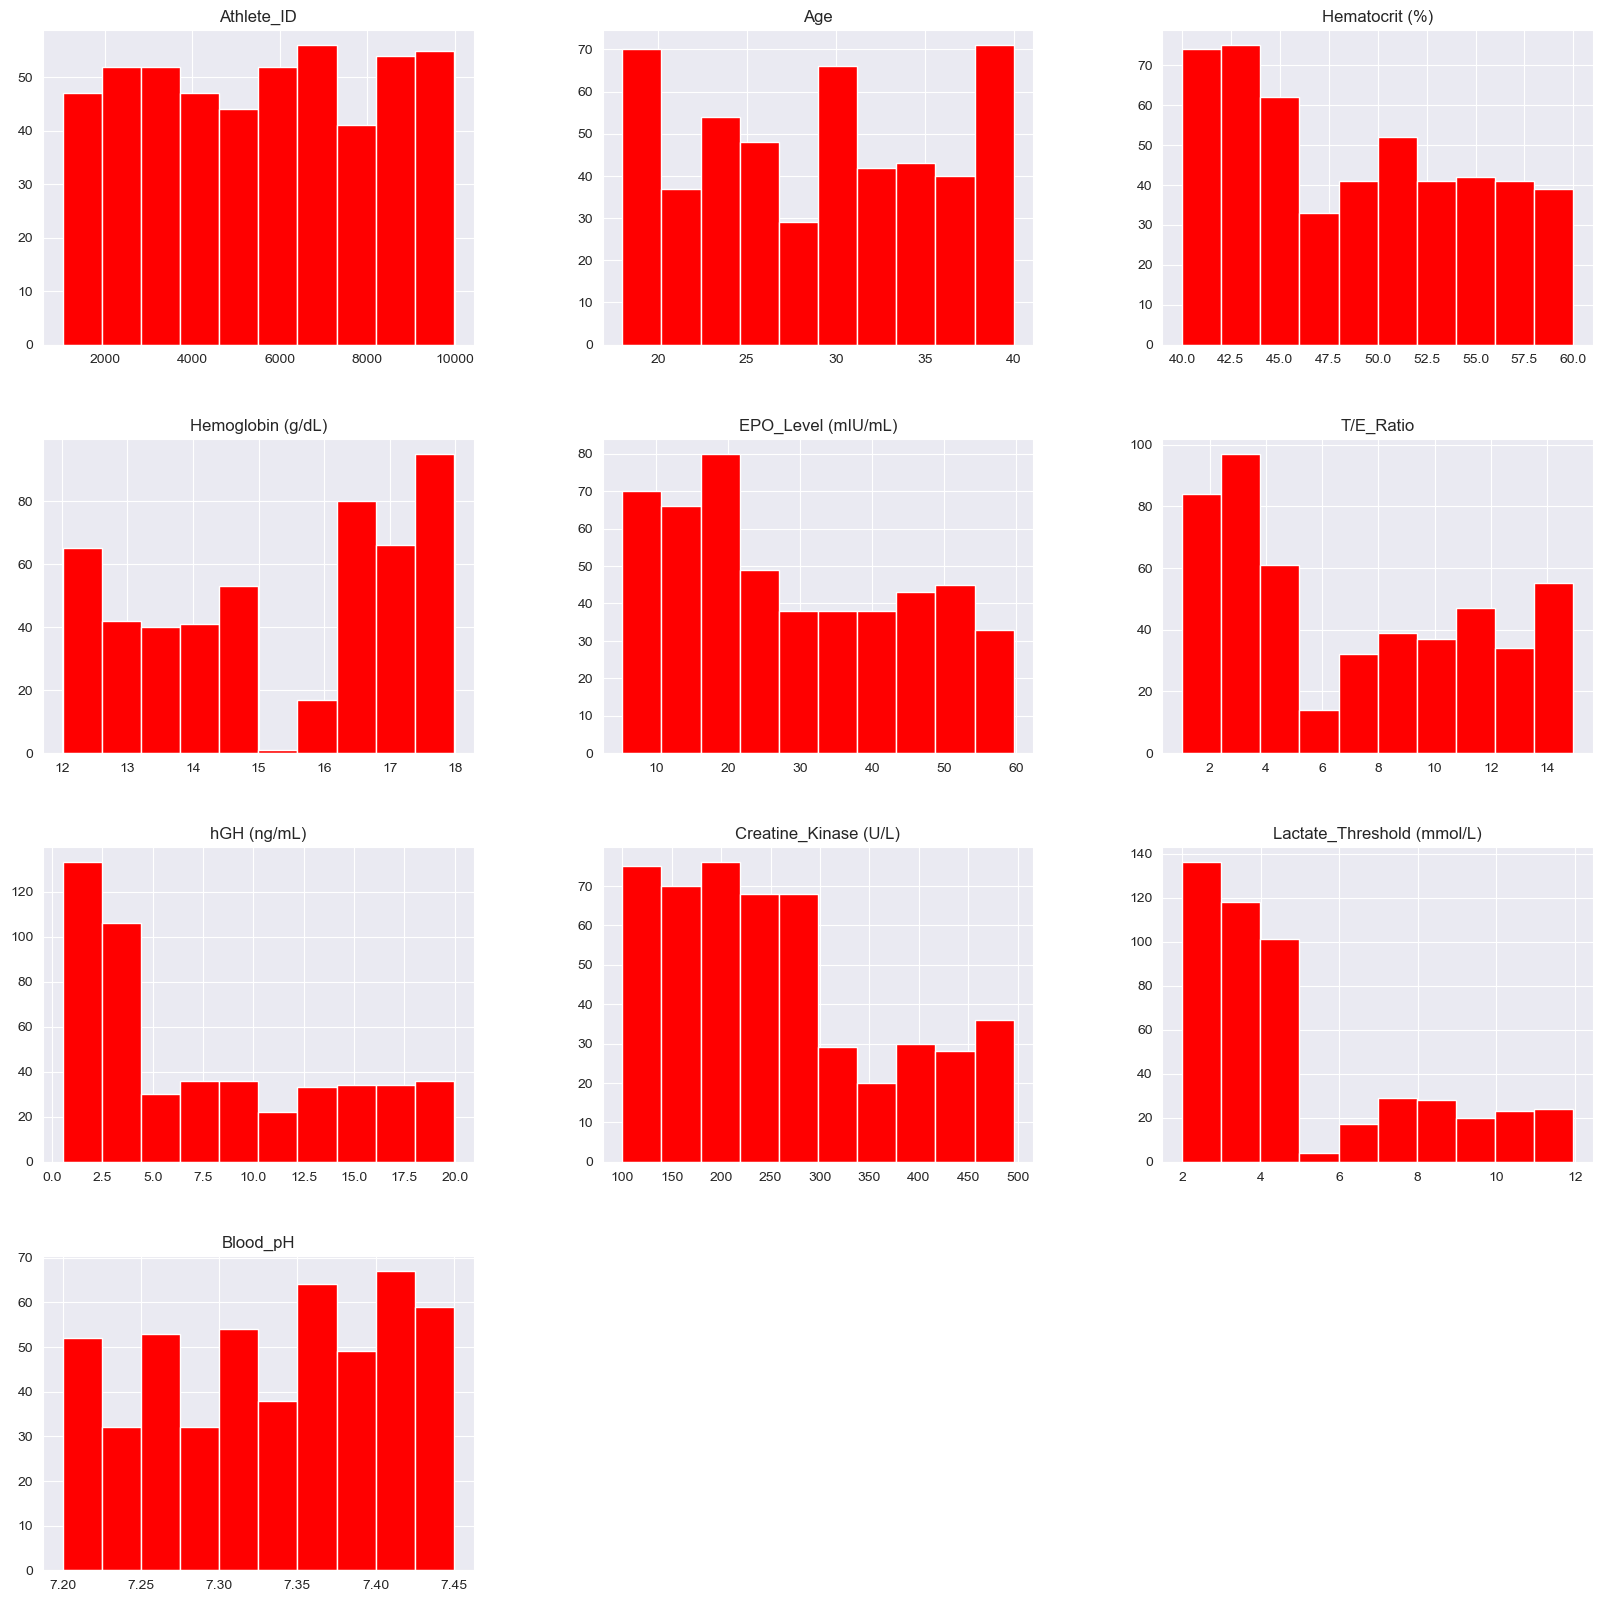

In [367]:

p = df.hist(figsize=(20, 20),color='red') # it shows the occurrence of every value in the graphical structure, letting us know the range of the data.

In [368]:
# The dataset contains important features such as Age, Gender, and Sport Type, which provide contextual data about the athlete. 
# Key physiological markers include Hematocrit, Hemoglobin, EPO Level, T/E Ratio, and hGH, which are commonly elevated due to performance-enhancing drugs.
# Additionally, the presence of Steroid Metabolites, Beta-2 Agonists, Stimulants, and Diuretics/Masking Agents help in detecting drug use. 
# Other features like Creatine Kinase, Lactate Threshold, and Blood pH provide insight into muscle activity and endurance,
# helping predict potential drug use.

C:\Users\Muskan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


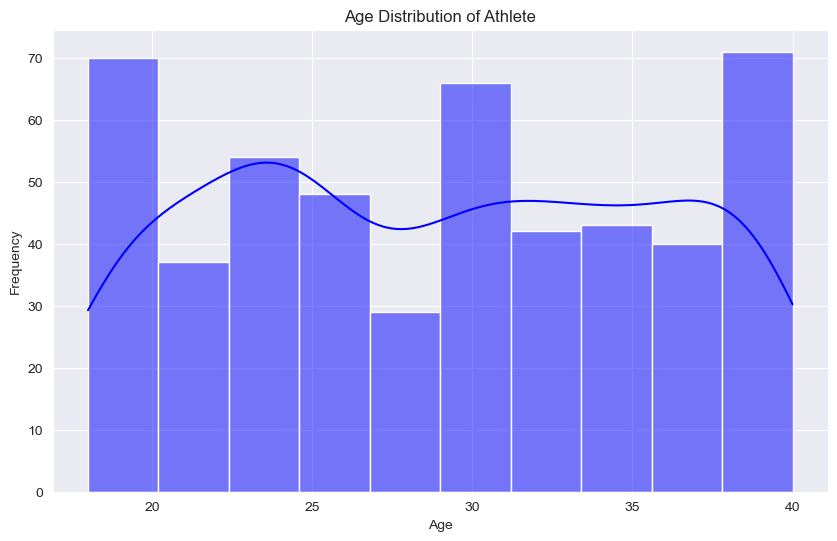

In [369]:
# Visualizing the target variable
sns.set_style('darkgrid')

# Plotting histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde = True, color = 'blue', bins = 10)
plt.title('Age Distribution of Athlete')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

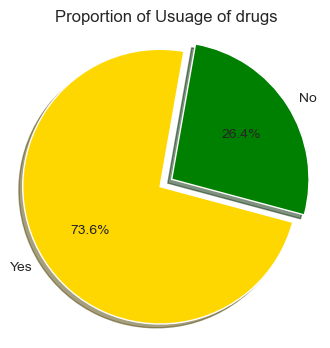

In [370]:
labels = 'Yes', 'No'
sizes = df['Drug_Use'].value_counts()
colors = ['gold', 'green']
explode = (0.1, 0)  # explode the slice for 'Yes'

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=80)
plt.title('Proportion of Usuage of drugs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


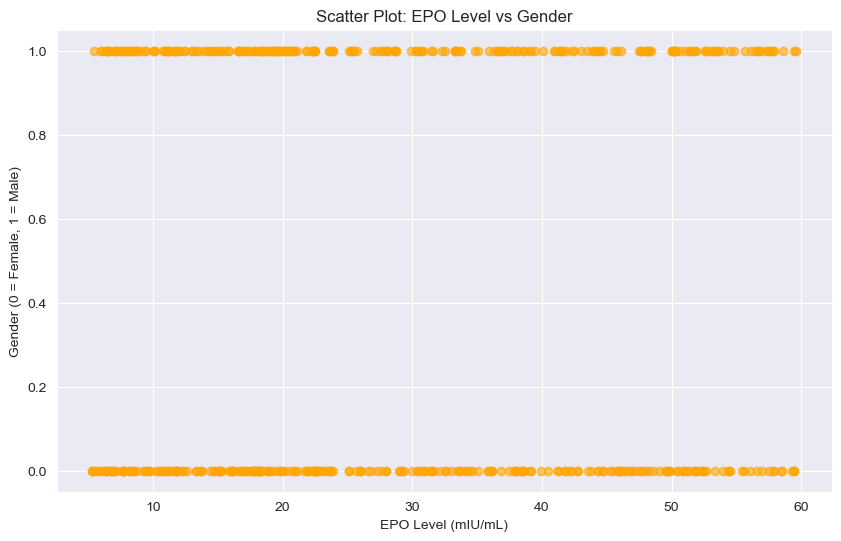

In [371]:
# Convert 'Gender' column to numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Converts 'Male'/'Female' to 0/1

# Scatter plot using EPO_Level and Gender (now numeric)
plt.figure(figsize=(10, 6))
plt.scatter(df['EPO_Level (mIU/mL)'], df['Gender'], color='orange', alpha=0.6)

plt.title('Scatter Plot: EPO Level vs Gender')
plt.xlabel('EPO Level (mIU/mL)')
plt.ylabel('Gender (0 = Female, 1 = Male)')
plt.show()



In [372]:
# input
x = df.iloc[:,:-1].values

# output 
y = df.iloc[:,-1].values

x,y

(array([[6900, 39, 0, ..., 150, 4.49, 7.38],
        [2018, 36, 0, ..., 496, 8.86, 7.32],
        [4534, 35, 0, ..., 258, 2.98, 7.36],
        ...,
        [6923, 25, 1, ..., 485, 10.71, 7.2],
        [5457, 39, 0, ..., 435, 8.65, 7.28],
        [7770, 18, 1, ..., 172, 2.61, 7.25]], dtype=object),
 array(['No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
        'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
        'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
        'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
        'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
        'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
        'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
        'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
        'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
        'Yes', 'Yes', 'No', '

In [373]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Step 1: Encode Categorical Variables
label_encoder = LabelEncoder()

# Convert all categorical columns to numeric
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Convert 'Male'/'Female' to 0/1
df['Sport_Type'] = label_encoder.fit_transform(df['Sport_Type'])
df['Steroid_Metabolites'] = label_encoder.fit_transform(df['Steroid_Metabolites'])
df['Beta_2_Agonist (ng/mL)'] = label_encoder.fit_transform(df['Beta_2_Agonist (ng/mL)'])
df['Stimulant_Detection'] = label_encoder.fit_transform(df['Stimulant_Detection'])
df['Diuretics_Masking_Agents'] = label_encoder.fit_transform(df['Diuretics_Masking_Agents'])
df['Drug_Use'] = label_encoder.fit_transform(df['Drug_Use'])  # Target

# Step 2: Define X (features) and y (target)
X = df.drop(columns=['Athlete_ID', 'Drug_Use'])  # Features
y = df['Drug_Use']  # Target

# Step 3: Apply SelectKBest feature selection
selector = SelectKBest(score_func=mutual_info_classif, k='all')
X_new = selector.fit_transform(X, y)

# Display the selected features
print(X_new)


[[ 39.     0.     2.   ... 150.     4.49   7.38]
 [ 36.     0.     3.   ... 496.     8.86   7.32]
 [ 35.     0.     4.   ... 258.     2.98   7.36]
 ...
 [ 25.     1.     0.   ... 485.    10.71   7.2 ]
 [ 39.     0.     3.   ... 435.     8.65   7.28]
 [ 18.     1.     0.   ... 172.     2.61   7.25]]


In [374]:
# Feature Scaling 
# to maintain consistency in data so that machine is not biased
# Standardization -> Logistic regression : transform features so that they have a mean of 0 and standard deviation of 1 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_new)
scaled_features

array([[ 1.50019548, -0.9530986 , -0.39016   , ..., -0.96701858,
        -0.17930734,  0.63038443],
       [ 1.05326535, -0.9530986 ,  0.21008615, ...,  2.18858293,
         1.41118724, -0.17953133],
       [ 0.90428864, -0.9530986 ,  0.8103323 , ...,  0.01796686,
        -0.72888327,  0.36041251],
       ...,
       [-0.58547847,  1.04920939, -1.5906523 , ...,  2.08826033,
         2.08450875, -1.79936283],
       [ 1.50019548, -0.9530986 ,  0.21008615, ...,  1.63224856,
         1.33475615, -0.71947516],
       [-1.62831545,  1.04920939, -1.5906523 , ..., -0.76637339,
        -0.86354757, -1.12443304]])

In [375]:
y = df.Drug_Use
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Drug_Use, dtype: int32

In [376]:
# Splitting the dataset -> describes role of training and testing set in model development process
# random_state -> random number generator to ensure reproductibility 
# test_size = 0.12 -> 12% for testing and 88 % for training data 
X_train,x_test,y_train,y_test = train_test_split(scaled_features,y,test_size=0.16,random_state=0)

from sklearn.tree import DecisionTreeClassifier

# Classification algorithms 
classifiers = {'Logistic Regression': LogisticRegression(),
               'Decision Tree': DecisionTreeClassifier(),
               'Random Forest': RandomForestClassifier(),
               'Support Vector Machine': SVC(),
               'Naive Bayes': GaussianNB(),
               'K-Nearest Neighbors': KNeighborsClassifier()           
}

In [377]:
print(X_train,y_train)

[[ 1.20224206 -0.9530986  -1.5906523  ...  0.71110477  0.86525089
  -1.66437687]
 [-1.62831545  1.04920939 -0.99040615 ... -0.26476044 -0.08467837
   1.30531422]
 [ 1.20224206  1.04920939  0.21008615 ... -1.25886611 -0.9181412
  -0.31451728]
 ...
 [ 0.15940508 -0.9530986  -0.99040615 ... -0.28300091 -0.92542035
   0.49539847]
 [ 1.64917219  1.04920939 -0.99040615 ... -0.61132939 -0.99821187
  -1.12443304]
 [ 1.35121877  1.04920939  0.21008615 ...  0.37365605 -0.92905993
   0.49539847]] 300    1
235    1
475    1
219    1
330    1
      ..
323    1
192    0
117    1
47     1
172    1
Name: Drug_Use, Length: 420, dtype: int32


In [378]:
print(x_test,y_test)

[[-0.43650176  1.04920939  1.41057846 ...  0.34629534 -0.53234618
   0.22542655]
 [ 0.01042837 -0.9530986  -0.99040615 ...  0.98471183  1.21828973
  -0.44950324]
 [-0.8834319   1.04920939  1.41057846 ... -0.91229716 -0.01552643
   0.36041251]
 ...
 [-1.62831545 -0.9530986   1.41057846 ... -1.30446729 -1.02732847
   0.76537039]
 [ 0.4573585  -0.9530986   0.8103323  ... -0.85757575 -0.42679848
  -1.66437687]
 [-1.62831545 -0.9530986   1.41057846 ... -1.2041447  -0.92178078
  -1.66437687]] 90     1
254    1
283    1
445    0
461    0
      ..
362    1
264    1
100    1
491    0
295    1
Name: Drug_Use, Length: 80, dtype: int32


In [379]:
# Training and evaluating classifiers 

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train,y_train)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    print(f"Confusion Matrix for {name}: \n" ,cm)
    accuracy = accuracy_score(y_test,y_pred)
    results[name] = accuracy 
    print(f'{name} Accuracy : {accuracy *100:.4f} %')
    print(classification_report(y_test,y_pred)) 
    print('.............................................................')


Confusion Matrix for Logistic Regression: 
 [[19  0]
 [ 0 61]]
Logistic Regression Accuracy : 100.0000 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        61

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

.............................................................
Confusion Matrix for Decision Tree: 
 [[19  0]
 [ 0 61]]
Decision Tree Accuracy : 100.0000 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        61

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

.............................................................
Confusion Matrix for Ran

In [380]:
# Finding the best classifier 
best_classifier = max(results, key=results.get)
print(f'Best Classifier: {best_classifier} with Accuracy : {results[best_classifier]:.4f}')


Best Classifier: Logistic Regression with Accuracy : 1.0000


In [381]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid 
param_grid = {
    'C' : [0.001, 0.01, 0.1,1, 10],
    'penalty': ['l1' ,'l2'],
    'solver': [ 'liblinear','saga']
}

# Create a Logistic Regression Model
logistic_regression = LogisticRegression(max_iter=1000)

#Create GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression,param_grid=param_grid,cv=5,scoring ='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best scores 
best_params = grid_search.best_params_
best_score = grid_search.best_score_

y_pred = grid_search.predict(x_test)

In [382]:
print("Best Parameters:", best_params)
print("Best Score:",best_score)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 1.0


In [383]:
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

Best Model: LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')


In [384]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score{f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0000
Precision: 1.0000
F1 Score1.0000
Confusion Matrix:
 [[19  0]
 [ 0 61]]


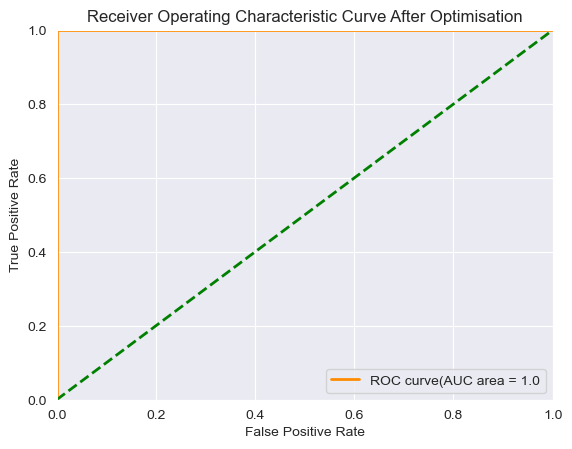

In [385]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# actual outcomes and predicted possibilities
# Calculate ROC Curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

# Calculate AUC
roc_auc = auc(fpr,tpr)

# polt roc curve

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange',lw =2 ,label =f'ROC curve(AUC area = {roc_auc}')
plt.plot([0,1],[0,1],color = 'green',lw =2 ,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve After Optimisation')
plt.legend(loc ='lower right')
plt.show()

In [386]:
# Create a logistic regression model with regularization ( # We decided to use this for our model)
log_reg = LogisticRegression(C=1.0, penalty='l2')

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [387]:
from sklearn.ensemble import AdaBoostClassifier

# Now you can use AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)


In [388]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Sample code to train the AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, print a more detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[19  0]
 [ 0 61]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        61

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
#............................................................Testing.................................................................................
# .............................................if new data is provided test whether drug user  or not .................................................

In [394]:
# Train a random forest classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=123)
rfc.fit(X_train, y_train)

# Create a new patient's data
new_athlete = [[6, 148, 72, 35, 0, 33.6, 0.627, 50, 1, 1, 1, 1, 1, 1, 1]]  # replace with your own values

# Scale the new patient's data using the same scaler used for training
new_athlete_scaled = scaler.transform(new_athlete)

# Use the trained model to make a prediction
prediction = rfc.predict(new_athlete_scaled)

# Print the prediction
if prediction[0] == 0:
    print("The athlete has not used drug.")
else:
    print("The athlete is a drug user.")

The athlete is a drug user.
